#  day 2 afternoon session

##  Random walks

In [65]:
import numpy as np
import pandas as pd
from pylab import plt
from sklearn import linear_model
plt.style.use('seaborn')
#matplotlib inline

data_url = 'http://hilpisch.com/tr_eikon_eod_data.csv'
raw = pd.read_csv(data_url, index_col=0,parse_dates=True)
raw.dropna(inplace=True)

symbols = 'SPY'

data = pd.DataFrame(raw[symbols])

### So this is guestimmating if the price will go up or down based on previous history
if a price is going up it will more than likely go up again, unless it goes down

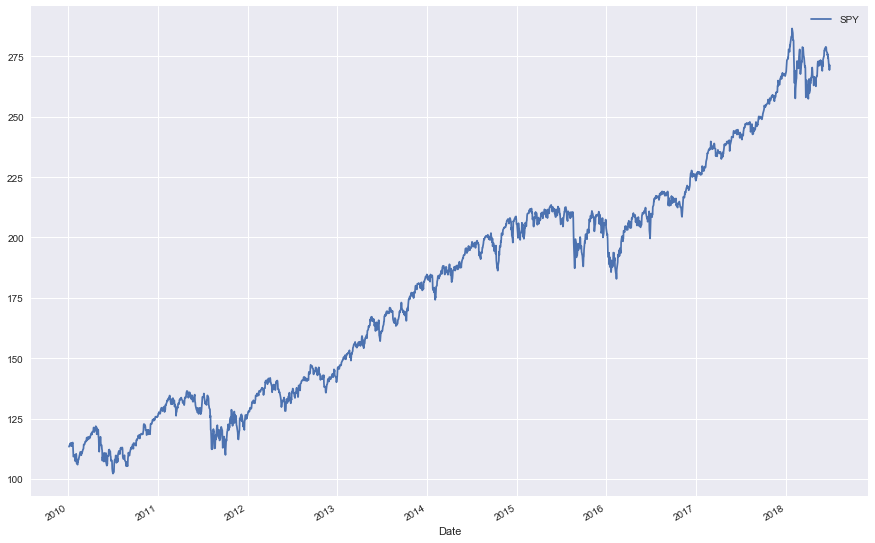

In [3]:
data.plot(figsize=(15,10));

In [4]:
lags = 5
columns = []
for lag in range(1,lags+1):
    column = 'lag_{}'.format(lag)
    data[column] = data[symbols].shift(lag)
    columns.append(column)

In [ ]:
data.head(10)

In [5]:
data.dropna(inplace=True)

In [6]:
lag_prices = np.linalg.lstsq(data[columns], data[symbols], rcond=-1)[0]

In [7]:
data['Prediction'] = np.dot(data[columns], lag_prices)

In [ ]:
data.head()

In [ ]:
data[[symbols,'Prediction']].plot(figsize=(15,10))

In [ ]:
data[[symbols, 'Prediction']].iloc[-100:].plot(figsize=(15,10))
#this is basically showing that the lagging effect is making the price prediction inaccurate

##  Estimation returns by OLS (?)
    so are we worried that we dont know the price or are we happy enough just knowing direction

In [19]:
rets = pd.DataFrame(np.log(data[symbols] / data[symbols].shift(1))).dropna()

In [29]:
cols = []
for lag in range(1, lag + 1):
    column = 'lag_{}'.format(lag)
    rets[column] = rets[symbols].shift(lag)
    cols.append(column)

In [30]:
rets.dropna(inplace=True)

In [31]:
rets.head()

,SPY,lag_1
Date,,
2010-01-13,0.008411,-0.009370
2010-01-14,0.002701,0.008411
2010-01-15,-0.011288,0.002701
2010-01-19,0.012418,-0.011288
2010-01-20,-0.010221,0.012418


In [32]:
reg = np.linalg.lstsq(rets[cols],rets[symbols],rcond=-1)[0]

In [33]:
rets['Direction'] = np.sign(rets[symbols])

In [41]:
for lag in range(1, lag + 1):
    column = 'lag_{}'.format(lag)
    rets[column] = rets[symbols].shift(lag)
    cols.append(column)

In [42]:
rets['Prediction'] = np.dot(rets[cols],reg)

##

# need to catch up where we're at here

##

# rets['Strategy'] missing
# rets['Position'] missing


ValueError: shapes (2131,2) and (1,) not aligned: 2 (dim 1) != 1 (dim 0)

## adding transational costs

In [40]:
# ptc = proportional transaction cost
ptc = 0.0001
# seems to think it's the minimum spread, which is might be but that's not transaction cost really

In [39]:
rets['Strategy_ptc'] = np.where(rets['Strategy'].diff() != 0, rets['Strategy'] - ptc, rets['Strategy'])

KeyError: 'Strategy'

In [ ]:
rets[[symbols, 'Strategy','Strategy_ptc']].cumcum().apply(np.exp).plot(figsize=(15,10))

##  Classification

In [61]:
## Machine learning and the stuff

###  with OLS regression

In [95]:
# so import scikit-lean as skl
np.random.seed(200) # this just lets the original array be the same for testing
d = np.random.randint(0,2,24).reshape((8,3))


In [96]:
features = d[:,:2]
labels = d[:, -1]

In [97]:
reg = np.linalg.lstsq(features, labels, rcond=-1)[0]

In [98]:
pred = np.dot(features, reg)

In [99]:
pred_ = np.where(pred > 0.5, 1, 0 )

pred_ == labels

array([False, False,  True,  True, False, False,  True,  True])

###  with Machine learning

In [100]:
model = linear_model.LinearRegression(fit_intercept=False)

In [101]:
model.fit(features,labels)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [102]:
model.coef_

array([6.40987562e-17, 6.66666667e-01])

In [103]:
np.dot(features, model.coef_)

array([0.66666667, 0.        , 0.66666667, 0.66666667, 0.66666667,
       0.        , 0.66666667, 0.66666667])

In [104]:
model.predict(features)

array([0.66666667, 0.        , 0.66666667, 0.66666667, 0.66666667,
       0.        , 0.66666667, 0.66666667])

In [105]:
lr = linear_model.LogisticRegression(solver='lbfgs')

In [106]:
lr.fit(features, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [107]:
pred_lr = lr.predict(features)

In [108]:
from sklearn.metrics import accuracy_score

In [109]:
accuracy_score(pred_lr, labels)

0.75

### Vector Machines

In [110]:
from sklearn.svm import SVC

In [111]:
svm = SVC(gamma='auto', kernel='linear')

In [112]:
svm.fit(features, labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [116]:
pred_svm = svm.predict(features)

In [118]:
accuracy_score(pred_svm, labels)

0.75